In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [88]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [89]:
train = train.fillna(-1)

In [90]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.445890,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.111644,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.960241,9981.264932,1.382997,1.112799,30.202904,20.645407,180.734517,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,-1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [91]:
cats = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 
        'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir',
        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
        'Exterior1st', 'Exterior2nd', 'ExterQual', 'Fence', 
        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 
        'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
        'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 
        'LandSlope', 'LotConfig', 'LotShape', 'MasVnrType', 
        'MiscFeature', 'MoSold', 'MSSubClass', 'MSZoning', 
        'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 
        'SaleCondition', 'SaleType', 'Street', 'Utilities']
nums = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', '1stFlrSF', 
        '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 
        'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 
        'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 
        'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 
        'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MiscVal', 
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 
        'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 
        'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [140]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer().fit(train[cats].T.to_dict().values())
cat_matrix = dv.transform(train[cats].T.to_dict().values())

In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly_cat = PolynomialFeatures()
poly_cat_matrix = poly_cat.fit_transform(cat_matrix.toarray())

In [142]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(poly_cat_matrix, train['SalePrice'])
ridge_preds = ridge.predict(poly_cat_matrix)
ridge_preds = [[i] for i in ridge_preds]

In [143]:
from scipy.sparse import hstack
data_matrix = hstack([ridge_preds, train[nums]])

In [32]:
import xgboost. as xgb

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [144]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_matrix = poly.fit_transform(data_matrix.toarray())

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.1s
[CV] n_estimators=100 ................................................
[CV] .................................. n_estimators=50, total=   2.3s
[CV] n_estimators=100 ................................................
[CV] .................................. n_estimators=50, total=   2.2s
[CV] n_estimators=100 ................................................
[CV] .................................. n_estimators=50, total=   2.1s
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.2min finished


Best: -13739128.042044 using {'n_estimators': 100}
-20031736.033177 (6177241.301585) with: {'n_estimators': 50}
-13739128.042044 (2688626.321828) with: {'n_estimators': 100}
-13957596.232583 (2753911.530893) with: {'n_estimators': 150}
-14161640.989078 (2834712.762185) with: {'n_estimators': 200}
-14333304.216760 (2922587.593025) with: {'n_estimators': 250}
-14337449.337006 (2914981.507795) with: {'n_estimators': 300}
-14434220.823952 (2852923.062550) with: {'n_estimators': 350}


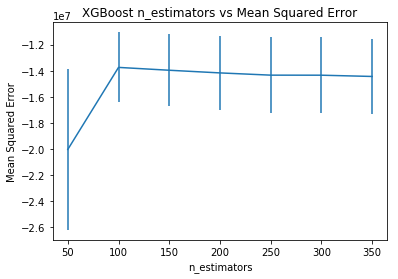

In [145]:
from sklearn.model_selection import GridSearchCV
boost = xgb.XGBRegressor()

n_estimators = range(50, 400, 50)
tuned_parameters = dict(n_estimators=n_estimators)
grid = GridSearchCV(boost, tuned_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid.fit(poly_matrix, train['SalePrice'])

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds) 
plt.title("XGBoost n_estimators vs Mean Squared Error") 
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')

In [146]:
%%time
boost = xgb.XGBRegressor(n_estimators=100)
boost = boost.fit(poly_matrix, train['SalePrice'])

CPU times: user 2.56 s, sys: 9.65 ms, total: 2.57 s
Wall time: 2.57 s


In [147]:
train_preds = boost.predict(poly_matrix)

In [148]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(train['SalePrice'], train_preds)**0.5

2158.96374583


In [149]:
test = test.fillna(-1)
test_cat_matrix = dv.transform(test[cats].T.to_dict().values())
test_poly_cat_matrix = poly_cat.transform(test_cat_matrix.toarray())

test_ridge_preds = ridge.predict(test_poly_cat_matrix)
test_ridge_preds = [[i] for i in test_ridge_preds]

test_data_matrix = hstack([test_ridge_preds, test[nums]])
test_poly = poly.transform(test_data_matrix.toarray())

In [150]:
preds = boost.predict(test_poly)

In [151]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = preds

In [152]:
submission.to_csv('submission_xgb.csv', index=False)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

tuned_parameters = [{'n_estimators': [10, 100, 1000], 'min_samples_split': [5, 10, 20]}]
grid = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid.fit(data_matrix, train['SalePrice'])
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] min_samples_split=5, n_estimators=10 ............................
[CV] min_samples_split=5, n_estimators=10 ............................
[CV] min_samples_split=5, n_estimators=10 ............................
[CV] min_samples_split=5, n_estimators=10 ............................
[CV] ............. min_samples_split=5, n_estimators=10, total=   1.0s
[CV] min_samples_split=5, n_estimators=10 ............................
[CV] ............. min_samples_split=5, n_estimators=10, total=   1.1s
[CV] ............. min_samples_split=5, n_estimators=10, total=   1.1s
[CV] min_samples_split=5, n_estimators=100 ...........................
[CV] min_samples_split=5, n_estimators=100 ...........................
[CV] ............. min_samples_split=5, n_estimators=10, total=   1.1s
[CV] min_samples_split=5, n_estimators=100 ...........................
[CV] ............. min_samples_split=5, n_estimators=10, total=   1.1s
[CV] min_samples_

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min


[CV] ........... min_samples_split=20, n_estimators=100, total=   5.2s
[CV] min_samples_split=20, n_estimators=100 ..........................
[CV] ........... min_samples_split=20, n_estimators=100, total=   5.2s
[CV] min_samples_split=20, n_estimators=100 ..........................
[CV] ........... min_samples_split=20, n_estimators=100, total=   5.4s
[CV] min_samples_split=20, n_estimators=100 ..........................
[CV] ........... min_samples_split=20, n_estimators=100, total=   5.4s
[CV] min_samples_split=20, n_estimators=1000 .........................
[CV] ........... min_samples_split=20, n_estimators=100, total=   5.5s
[CV] min_samples_split=20, n_estimators=1000 .........................
[CV] .......... min_samples_split=20, n_estimators=1000, total=  53.4s
[CV] min_samples_split=20, n_estimators=1000 .........................
[CV] .......... min_samples_split=20, n_estimators=1000, total=  53.2s
[CV] min_samples_split=20, n_estimators=1000 .........................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 100, 1000], 'min_samples_split': [5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)
-900071013.75
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimato

In [16]:
forest = RandomForestRegressor(min_samples_split=5, n_estimators=100, n_jobs=-1)
forest = forest.fit(data_matrix, train['SalePrice'])

In [17]:
train_preds = forest.predict(data_matrix)

In [18]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(train['SalePrice'], train_preds)**0.5

12649.2817084


In [20]:
preds = forest.predict(test_data_matrix)

In [21]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = preds

In [22]:
submission.to_csv('submission_forest.csv', index=False)